In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

# USE FILTER BELOW

In [2]:

df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\passesfilter.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,eventId,minute,second,teamId,x,y,expandedMinute,...,qualifiers/11/value,isGoal,cardType/value,cardType/displayName,qualifiers/13/value,qualifiers/14/value,qualifiers/15/type/value,qualifiers/15/type/displayName,qualifiers/15/value,number
0,1188,1194,2293112223,648,66,27.0,1974,34.6,83.8,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,1190,1196,2293112573,650,66,49.0,1974,53.9,100.0,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
2,1295,1301,2293117573,706,74,24.0,1974,57.0,66.9,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3,1298,1304,2293117695,709,74,33.0,1974,82.2,78.9,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,1337,1343,2293119043,733,77,11.0,1974,84.0,100.0,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [4]:
# Use Value_Counts to see what Data we have
df['type/displayName'].value_counts(dropna = False)

Pass    21
Name: type/displayName, dtype: int64

In [5]:
df

,Unnamed: 0,Unnamed: 0.1,id,eventId,minute,second,teamId,x,y,expandedMinute,...,qualifiers/11/value,isGoal,cardType/value,cardType/displayName,qualifiers/13/value,qualifiers/14/value,qualifiers/15/type/value,qualifiers/15/type/displayName,qualifiers/15/value,number
0,1188,1194,2293112223,648,66,27.0,1974,34.6,83.8,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,1190,1196,2293112573,650,66,49.0,1974,53.9,100.0,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
2,1295,1301,2293117573,706,74,24.0,1974,57.0,66.9,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3,1298,1304,2293117695,709,74,33.0,1974,82.2,78.9,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,1337,1343,2293119043,733,77,11.0,1974,84.0,100.0,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5,1339,1345,2293119067,735,77,14.0,1974,77.5,92.3,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
6,1348,1354,2293119381,742,77,56.0,1974,69.2,88.1,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,1350,1356,2293119433,744,78,2.0,1974,73.3,85.7,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
8,1389,1395,2293120057,772,79,36.0,1974,27.6,91.4,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
9,1408,1414,2293120293,783,80,23.0,1974,70.4,82.9,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


## Plotting and Pitch

In [6]:
# Inflating X and Y to pitch size (statsbomb pitches don't match with WhoScored data)

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

## Pass Map

#### Light Pitch 

Background - #FFFFFF
lines - #B4B6BA

#### Dark Pitch

Background - #1B1B1B
lines - #c7d5cc

#### Blue Pitch (Primary colour)
Background - #0B0725
lines - #B4B6BA

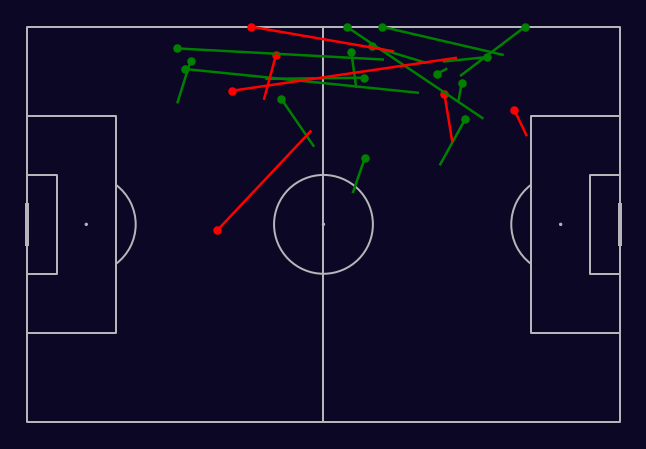

In [76]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#0B0725')
ax.patch.set_facecolor('#0B0725')


pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#0B0725', line_color='#B4B6BA', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass

for x in range(len(df['x'])):
    if df['outcomeType/displayName'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),
                 (df['y'][x],df['endY'][x]),
                 color='green',
                 linewidth=2.5)
                 
        plt.scatter(df['x'][x],df['y'][x],
                     color='green',
                     marker="o", 
                     linewidth=2.5)
                     
for x in range(len(df['x'])):
    if df['outcomeType/displayName'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),
                 (df['y'][x],df['endY'][x]),
                 color='red',
                 linewidth=2.5)
                 
        plt.scatter(df['x'][x],df['y'][x],
                     color='red',
                     marker="o", 
                     linewidth=2.5)
        
#plt.savefig('test.png',dpi=500,bbox_inches = 'tight') 
   
